## Brownian Motion Assignment

In this assignment, your task is to write some code to answer questions with numerical answers.

For full credit in this assignment, you neeed to do **two** things:

- upload this jupyter notebook with code you used to answer the questions
- upload the (otter) notebook entitled *BrownianMotionAssignmentOtter*
supplying **your numerical answers only**.


**Simulating Brownian motion sample paths**

As we discussed in the lectures, we can simulate *standard* Brownian motion $B_t,$ for $t$ in the time interval $[0,T]$ starting at the value $B_0$ using a grid subdivided into $N$ intervals using the following:

1. Define the time increment $\Delta = 1/N.$
2. Generate iid random variables $\delta_i, i=1,\ldots,N$ distributed $N(0,1)$
3. Define $B_{j\Delta} = B_0+\sqrt{\Delta}\sum_{i=1}^j \delta_j.$

This leads us to be able to use the following function to generate a *realization* of one of these Brownian motion sample paths. This function takes as arguments

- B0 = starting point for the sample path at time 0
- T = end time for the path 
- N = number of intervals in which to break up the time interval $[0,T]$

and returns two 1-d numpy arrays. 

- the array of $N+1$ equispaced time points from 0 to T.
- the array of positions of the path at each time point

In [2]:
import numpy as np
def BMrealization(B0,T,N):
    Delta=1/N
    rtDelta=np.sqrt(Delta)
    delta=np.random.normal(0,1,size=N)
    delta=np.insert(delta,0,0)
    B=np.cumsum(delta)*rtDelta
    T=np.linspace(0,T,N+1)
    return T,B

Here we plot some realizations of Brownian motion starting from 0.

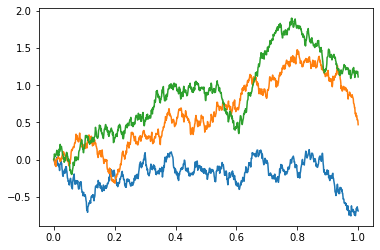

In [3]:
import matplotlib.pyplot as plt
T,B0=BMrealization(0,1,1000)
T,B1=BMrealization(0,1,1000)
T,B2=BMrealization(0,1,1000)
plt.plot(T,B0)
plt.plot(T,B1)
plt.plot(T,B2)

plt.show()

**Distribution of maximum of Brownian motion**

For Brownian motion $B_t, t \in [0,T]$ starting at 0, there is a famous theorem that says that 
$$
P[ \max_{t\in [0,T]} B_t \geq C] = 2P[B_T >C]
$$
for $C>0$.
Since we know that $B_T \sim N(0,T)$ we get 
$$
P[ \max_{t\in [0,T]} B_t >C] = 2(1-\Phi(C/\sqrt{T}))
$$
where $\Phi$ denotes the $N(0,1)$ cumulative distribution function. 

An argument for why this is true goes as follows. Conditionally, given that $B_t \geq C$ for some $t \in [0,T]$ consider the first time $T^*$ that this happens. From that point in time the process $B_t, t\in [T^*,T]$ behaves like Brownian motion starting at 
position $K$ at time $T^*$ and this process at any later time, including time $T$ is equally likely to be below $K$ and above $K.$
Define the event
$$A = \{ B_t\geq K, \mbox{ for some } t \in [0,T]\}.$$
What we just said is that
$$
(1)~~~~~~~~~~ P[X_T > K \vert A] = P[X_T < K \vert A], 
$$
or equivalently (by the definition of conditional probability)
$$
P[\{X_T > K\} \cap A] = P[\{ X_T < K\} \cap  A] 
$$
Observe that $X_T > K$ implies $A$ so $\{X_T > K\} \cap A = \{ X_T>K\}.$ 
Also
$$
P[\{ X_T < K\} \cap  A] + P[\{ X_T > K\} \cap  A] = P[A],
$$ 
so
$$
P[\{ X_T < K\} \cap  A] = P[A] - P[\{ X_T > K\} \cap  A] = P[A] - P[X_T >K]
$$ 
Substituting into (1) we obtain
$$
P[X_T>K] = P[A]-P[X_T>K]
$$
i.e.
$$
P[A] = 2 P[X_T>K].
$$

**Example.** From a standard normal cdf table we know that $\Phi(1) \approx 0.8413447$ so
$$
P[ \max_{t\in [0,T]} B_t >1] \approx 2*(1-.8413447) \approx 0.31731 
$$

**Question 1.**

Use Monte-Carlo simulation to get 4 different approximations $\hat{p}$ for 
$$
P[ \max_{t\in [0,T]} B_t \geq 1].
$$
assuming the Brownian motion starts at position 0 at time 0.

Do this using the following values of $N$ (number of subdivisions of $[0,1]$).

- N=10
- N=100
- N=1,000
- N=10,000

For each Monte-Carlo simulation, using a sample size of n=100,000 realizations of Brownian sample paths,
For each case, give lower and upper 95% confidence bounds for your probability using
$$
\hat{p} \pm 1.96 \sqrt{{\hat{p}(1-\hat{p}) \over n}},
$$
i.e. the 95% lower bound is 
$$
\hat{p} -1.96 \sqrt{{\hat{p}(1-\hat{p}) \over n}}
$$ 
and the 95% upper bound is 
$$
\hat{p}+1.96 \sqrt{{\hat{p}(1-\hat{p}) \over n}}.
$$
the quantity 
$$
1.96 \sqrt{{\hat{p}(1-\hat{p}) \over n}}
$$
is referred to as the *half-width* of the 95% confidence interval for $p.$

In the answer notebook, you will be asked to provide 4 probability estimates(one for each value of **N**) and 4 half-widths of 95% confidence intervals (one for each value of **N**).

**Question 2.**

Use Monte-Carlo simulation with sample size 100,000 to get an approximation for the probability $\hat{p}$ that the absolute value of a Brownian motion position starting at 0 never exceeds 1 in absolute value i.e.
$$
\vert B_t \vert <  1, \mbox{ for all } t \in [0,1].
$$
use the value N=10,000 for the number of subdivisions of $[0,1].$

Again, also compute the half-width of the 95% confidence interval for the probability.

**Stopping when an event occurs**

Instead of running Brownian motion for a pre-determined amount of time, we might want to run it until $B_t$ satisfies some condition. For example, suppose we want to know the expected amount of time it takes for the 
Brownian motion path to cross some barrier. 

Here is an example. In the figure below we see plots of the the curves $\pm \sqrt{1-t^2}$ (in black) and three independent Brownian paths. 

Each path must eventually cross the barrier defined by the black curves at some point in time. What is the expected value of that random time when this occurs?

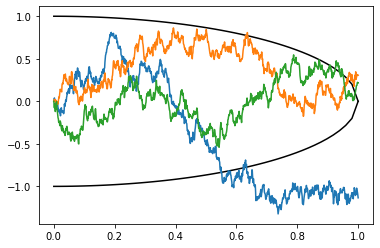

In [12]:
import matplotlib.pyplot as plt
t=np.linspace(0,1)
y1=np.sqrt(1-t**2)
y2=-np.sqrt(1-t**2)
plt.plot(t,y1,color="black")
plt.plot(t,y2,color="black")
T,B=BMrealization(0,1,1000)
plt.plot(T,B)
T,B=BMrealization(0,1,1000)
plt.plot(T,B)
T,B=BMrealization(0,1,1000)
plt.plot(T,B)


**Question 3.** 

Write a program that returns time the first time $t$ for which a $B_t^2 + t^2 \geq r^2$ for a single realization of Brownian motion. 

Ths code should take as arguments

- **B0** = starting position for sample path at time 0
- **delta** = size of time interval for discretization 
- **r** = threshold value 

and it should only track a Brownian path until a time **t** at which 
$B_t^2+t^2 \geq r^2,$ and return that time. 

**Important:** For efficiency reasons, your code should not generate any of the path $B_t$ takes after  $B_t^2 + t^2 \geq r^2.$

Use the function you wrote above to estimate the expected value of the amount of time it takes for Brownian motion starting at 0 to reach the value 1, and construct an approximate 95% confidence interval for that amount of time. 

Take $n=10,000$ realizations and use delta=.0001.

**Note:** Here, your estimate should be the sample mean of hitting times $T_1,\ldots,T_n$ based on $n=1000$ realizations, and your approximate 95% confidence interval can be taken to be of the form
$$
\overline{T} \pm 1.96 s/\sqrt{n},
$$
where $s$ denotes the sample standard deviation
$$
s= \sqrt{{\sum_{i=1}^n (T_i - \overline{T})^2 \over (n-1)}}.
$$

**Higher-Dimensional Brownian Motion**

We can also define *standard* Brownian motion in higher dimensions. Just like we simulated Brownian using a rescaled random walk, we can do the same in higher dimensions. For example for dimension 2, a random walk starting at (0,0) can make a jump at time $j\Delta$ by an increment of $\sqrt{\Delta}(Z_\,Z_2)$ where $Z_1$ and $Z_2$ are independent $N(0,1)$ random variables, for $j=0,1,\ldots.$ As $\Delta \rightarrow 0$ we get sample paths of the form $(B^{(1)}_t,B^{(2)}_t)$, where $B^{(i)}_t$ are independent Brownian motions for $i=1,2.$

**Bottom line:** We can simulate *standard* Brownian motion in 2-d starting at (0,0) by using two independent simulations of 1-d Brownian motion. 

Below we generate 3 independent realizations of this process in the time interval $[0,.1]$ and plot them.


(-1.0, 1.0)

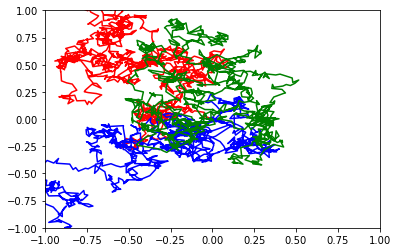

In [10]:
import matplotlib.pyplot as plt
T,B1=BMrealization(0,.1,1000)
T,B2=BMrealization(0,.1,1000)
plt.plot(B1,B2,marker='.', markersize=.01,color="red")
T,B1=BMrealization(0,.1,1000)
T,B2=BMrealization(0,.1,1000)
plt.plot(B1,B2,marker='.', markersize=.01,color="blue")
T,B1=BMrealization(0,.1,1000)
T,B2=BMrealization(0,.1,1000)
plt.plot(B1,B2,marker='.', markersize=.01,color="green")
plt.xlim(-1,1)
plt.ylim(-1,1)

**Question 4.** 

Use Monte-Carlo simulation to estimate expected amount of time it takes for 2-d Brownian motion to hit the unit circle and give the half-width for a 95% confidence interval (based on the confidence interval formulas in question 3).

Take $n=10,000$ realizations and use delta=.0001.


**d-Dimensional Brownian Motion**

We can generalize in a natural way to Brownian motion in $d$ dimensions starting at the origin $(0,\ldots,0).$ Here we just create a process with $d$ coordinates, where the coordinates are $d$ independent realizations of Brownian motion.

**Question 5.** 

Write a program that takes a positive integer dimension **d** as an argument, and computes a realization of $d$-dimensional Brownian motion that starts at the origin in $\mathbb{R}^d$  and runs until it leaves unit ball

$$
\{ x = (x_1,\ldots,x_d) ~:~: \sum_{i=1}^d x_i \leq 1 \}
$$

Use your code to estimate the expected amount of time it takes $d$-dimensional Brownian motion starting at the origin in $\mathbb{R}^d$ to leave the unit ball.

Try to get estimates (no confidence intervals needed) for various values of $d$ and use these answers to conjecture as to what the exact expected time is as a function of $d.$ 